# Quadrature methods for numerical integration
numerical integration
Let $f$ be a real integrable function defined in the interval $[a,b]$. Quadrature methods approximate it's integral 

$$I(f) = \int_a^b f(x)dx$$

with the integral of an approximation of $f$ here denoted with $f_n$ whose integral is easy to be computed.

Therefore the integral approximated integral can be written as:

$$I(f)\approx I(f_n) = \int_a^b f_n(x)dx$$

### Numerical Integration with Lagrange Interpolation

The function $f_n$ needs to be easy to integrate. A natural approach is to select $f_n=\Pi_n f$ with $\Pi_n f$ the Lagrange interpolant polynomial of $f$ on $n+1$ nodes $\{x_i\}$ with $i=0,\dots,n$. The approximated integral than becomes:

$$I_n(f)=\sum_{i=0}^n f(x_i) \int_a^b l_i (x) dx$$

where $l_i$ is the lagrange polynomial of grade $n$ relative to the node $x_i$

# Exercises

### Midpoin Rule

Let consider the function $f=sin(x)$. Implement the midpoint rule to compute its integral in the interval $[0,\pi/2]$

$$I_0(f) = (b-a)f\left(\frac{a+b}{2}\right)$$

In [25]:
import numpy as np
import matplotlib.pyplot as plt

a = 0
b = np.pi/2

def f(x):
    return np.sin(x)

def midpoint(f,a,b):
    assert a<b, "a should be smaller than b"
    I = f((a+b)/2)*(b-a)
    return I

I = midpoint(f,a,b)

Compute the error with respect to the exact interpolation

In [26]:
I_exact = 1
print(np.abs(I-I_exact))

0.11072073453959153


Implement a function that computes the same integral using the midpoint composite rule with $M$ quadrature points and compute the behavior of the error changing the number of quadrature points

$$I_{0,m}=H\sum_{k=0}^{m-1} f(x_k)$$

with $H$ being the lenght of each interval:

$$H = (b-a)/M$$
and
$$x_k = a+(2k+1)H/2$$ 
with 
$$k=0,\dots,M-1$$

In [27]:
def midpointComp(f,a,b,n):
    assert a<b, "a should be smaller than b"
    I = 0
    H = (b-a)/n
    for k in range(n):
        x_k = a+(2*k+1)*H/2
        I+=H*f(x_k)     
    return I

Text(0, 0.5, 'Error')

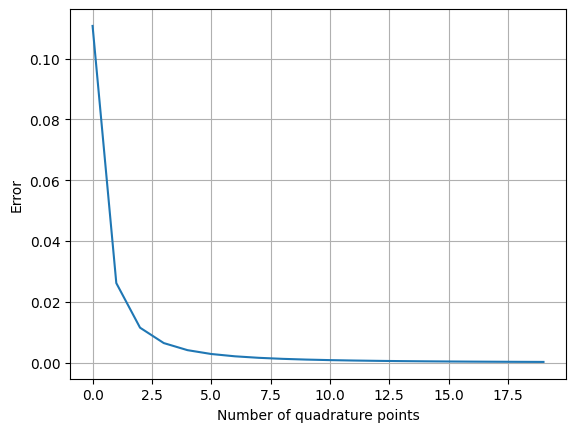

In [28]:
I = midpointComp(f,0,np.pi/2,3)
error = []

for i in range(20):
    error.append(np.abs(midpointComp(f,a,b,i+1)-I_exact))

plt.plot(error)
plt.grid()
plt.xlabel("Number of quadrature points")
plt.ylabel("Error")

## Trapeizodal Rule
Implement a function that implement the trapeizodal rule and perform the same exercise as before:
$$I_1(f) = \frac{b-a}{2}[f(a)+f(b)]$$


In [29]:
def trapRule(f,a,b):
    assert a<b,"a should be smaller than b"
    I = (b-a)/2*(f(a)+f(b))
    return I
I = trapRule(f,a,b)
print(I)

0.7853981633974483


In [30]:
I_exact = 1
print(np.abs(I-I_exact))

0.21460183660255172


Implement a function that implements the composite trapeizodal rule with $𝑀$ quadrature points and compute the behavior of the error changing the number of quadrature points:

$$I_{1,m}(f) = \frac{H}{2}\sum_{k=0}^{M-1}(f(x_k)+f(x_{k+1}))$$

with 
$$x_k = a+kH$$
for
$$k=0,\dots,M$$
and
$$H=(b-a)/M$$



In [31]:
def trapRuleComp(f,a,b,n):
    assert a<b,"a should be smaller than b"
    I = 0
    H = (b-a)/n
    for k in range(n+1):
        x_k = a+k*H
        if k == 0 or k == n:
            I+=f(x_k)/2
        else:
            I+=f(x_k)        
    return I*H

0.21460183660255172
0.0005140947514671312


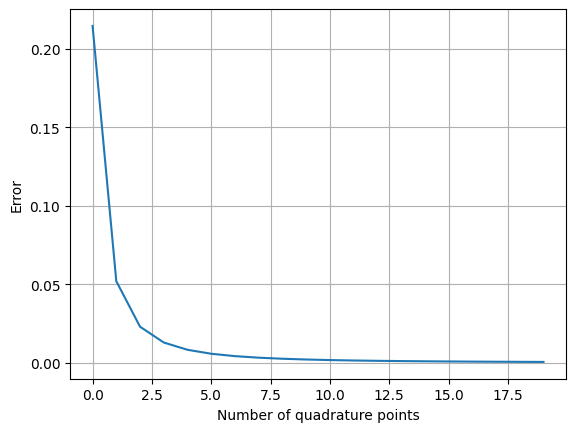

In [32]:
I = trapRuleComp(f,a,b,1)
print(np.abs(I-I_exact))
error = []
for i in range(20):
    error.append(np.abs(trapRuleComp(f,a,b,i+1)-I_exact))
    
plt.plot(error)
plt.grid()
plt.xlabel("Number of quadrature points")
plt.ylabel("Error")
print(error[-1])
                 

### Cavalieri-Simpson Rule
Do the same exercise with the Cavalieri-Simposon Rule and the composite Cavalieri-Simpson rule:

#### Cavalieri-Simpson
$$I_2(f) = \frac{b-a}{6}\left[f(a)+4f\left(\frac{a+b}{2}\right)+f(b)\right]$$
#### Composite Cavalieri-Simpson
$$I_{2,m} = \frac{H}{6}\left[f(x_0)+2\sum_{r=1}^{M-1}f(x_{2r})+4\sum_{s=1}^{M-1}f(x_{2s+1})+f(x_{2m})\right]$$

with

$$x_k = a+kH/2$$

for 

$$k = 0,\dots,2M$$

and 

$$H=(b-a)/M$$

In [33]:
def cavalieriSimpson(f,a,b):
    assert a<b,"a should be smaller than b"
    I = (b-a)/6*(f(a)+4*f((a+b)/2)+f(b))
    return I

In [34]:
I = cavalieriSimpson(f,a,b)
print(I)
print(np.abs(I-I_exact))

1.0022798774922104
0.0022798774922103693


In [35]:
def cavalieriSimpsonComp(f,a,b,n):
    assert a<b,"a should be smaller than b"
    indices = np.arange(0,2*n+1)
    H = (b-a)/n
    x = a + indices*H/2
    I = 0
    I +=f(x[0])
    I +=f(x[-1])
    for i in range(n):
        I+=2*f(x[2*i])
    for i in range(n):
        I+=4*f(x[2*i+1])
    return I*H/6

1.0022798774922104
0.0022798774922103693
1.3214379146475608e-08


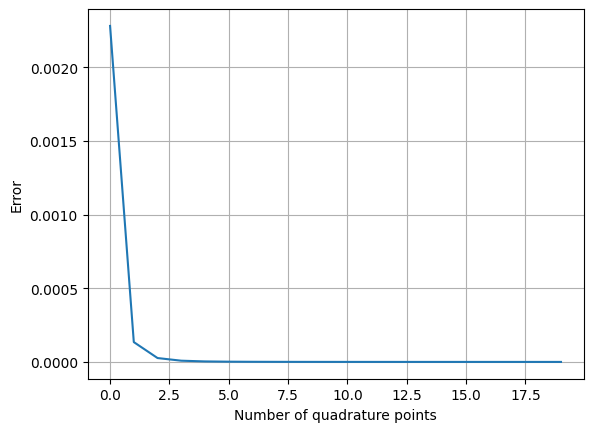

In [36]:
I = cavalieriSimpsonComp(f,a,b,1)
print(I)
print(np.abs(I-I_exact))

error = []
for i in range(20):
    error.append(np.abs(cavalieriSimpsonComp(f,a,b,i+1)-I_exact))
    
plt.plot(error)
plt.grid()
plt.xlabel("Number of quadrature points")
plt.ylabel("Error")
print(error[-1])

Compare the errors of the three methods

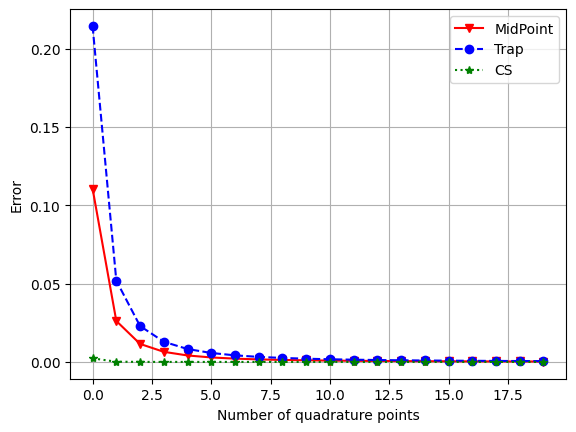

In [37]:
error_MP = []
error_T = []
error_CS = []


for i in range(20):
    error_MP.append(np.abs(midpointComp(f,a,b,i+1)-I_exact))
    error_T.append(np.abs(trapRuleComp(f,a,b,i+1)-I_exact))
    error_CS.append(np.abs(cavalieriSimpsonComp(f,a,b,i+1)-I_exact))
    
plt.plot(error_MP,'rv-',label="MidPoint")
plt.plot(error_T,'bo--',label="Trap")
plt.plot(error_CS,'g*:',label="CS")
plt.grid()
plt.xlabel("Number of quadrature points")
plt.ylabel("Error")
plt.legend()    

Implement a function that compute the integral of a function using the closed Newton-Cotes formulas. Hint: the Newton-Cotes table is given by:

`from scipy.integrate import newton_cotes`\
`alpha, _ = newton_cotes(n)`

Use the given table and compute the error.

1.021405182655144e-13


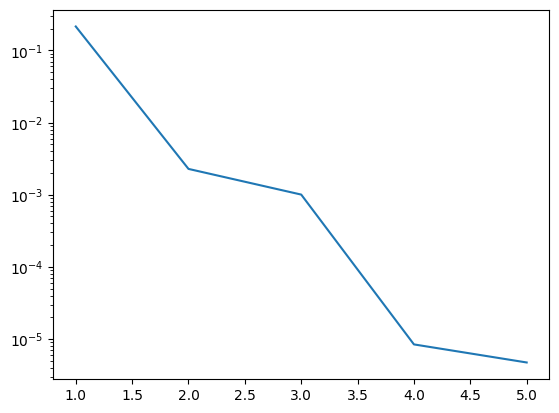

In [92]:
from scipy.integrate import newton_cotes

def newtonCotesClosed(a,b,n,f):
    h=(b-a)/(n)
    n2=n//2
    x_k = np.linspace(a,b,n+1)
    I = 0
    weights,_ = newton_cotes(n)
    I = h*(np.sum(weights*f(x_k)))    
    return I        
I = newtonCotesClosed(a,b,10,f)
print(np.abs(I-I_exact))

error = []
N = 5
for i in range(N):
    I = newtonCotesClosed(a,b,i+1,f)
    error.append(np.abs(I-I_exact))
plt.semilogy(np.arange(N)+1,error)

# Some Plots
Some plots to visually explain how numerical integration works

In [96]:
def plotMidpointComp(f,a,b,n,n2):
    assert a<b, "a should be smaller than b"
    H = (b-a)/n
    indices = np.arange(n)
    x = np.linspace(a,b,n2)
    xk = a + (indices*2+1)*H/2
    plt.plot(xk,f(xk),"ro")
    plt.plot(x,f(x))
    plt.plot(x,f(x)*0,"r-")
    for i in range(n):
        x2 = [xk[i]-H/2,xk[i]-H/2,xk[i]+H/2,xk[i]+H/2]
        y2 = [0,f(xk[i]),f(xk[i]),0]
        plt.fill(x2,y2,facecolor='red', alpha=0.5)
        plt.plot(x2,y2,"r-")

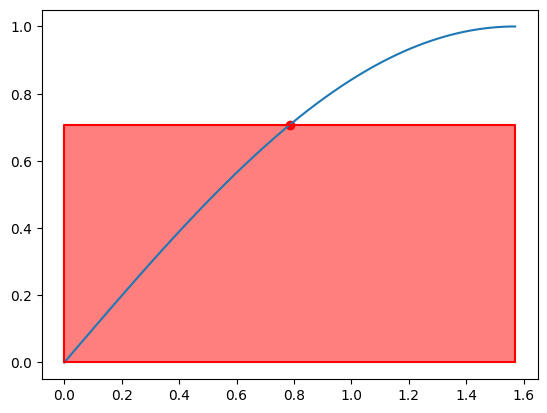

In [40]:
plotMidpointComp(f,a,b,1,100)

In [94]:
def plotTrapComp(f,a,b,n,n2):
    assert a<b, "a should be smaller than b"
    indices = np.arange(0,2*n+1)
    H = (b-a)/n
    indices = np.arange(n+1)
    x = np.linspace(a,b,n2)
    xk = a + (indices)*H
    plt.plot(xk,f(xk),"ro")
    plt.plot(x,f(x))
    plt.plot(x,f(x)*0,"r-")
    for i in range(n):
        x2 = [xk[i],xk[i],xk[i+1],xk[i+1]]
        y2 = [0,f(xk[i]),f(xk[i+1]),0]
        plt.fill(x2,y2,facecolor='red', alpha=0.5)
        plt.plot(x2,y2,"r-")

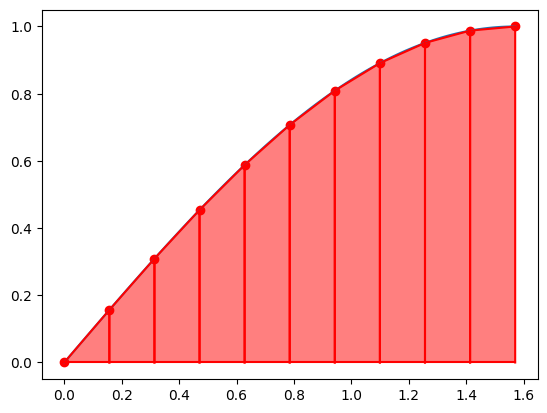

In [42]:
plotTrapComp(f,a,b,10,100)

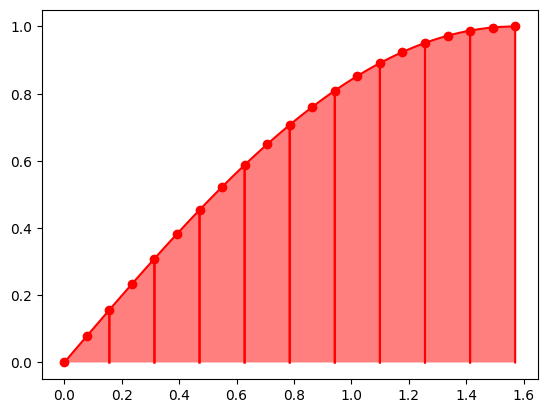

In [95]:
from scipy import interpolate
def plotCavalieriSimpsonComp(f,a,b,n,n2,n3):
    indices = np.arange(0,2*n+1)
    H = (b-a)/n
    xk = a + indices*H/2
    plt.plot(xk,f(xk),"ro")
    for i in range(n):
        x_i = [xk[2*i],xk[2*i+1],xk[2*i+2]] 
        y_i = f(x_i)
        f_int = interpolate.interp1d(x_i, y_i,kind='quadratic')
        x_i_plot = np.linspace(xk[2*i],xk[2*i+2],n3)
        y_i_plot = f(x_i_plot)
        x_i_plot = np.insert(x_i_plot,0,xk[2*i])
        y_i_plot = np.insert(y_i_plot,0,0)
        x_i_plot = np.append(x_i_plot,xk[2*i+2])
        y_i_plot = np.append(y_i_plot,0)

        plt.fill(x_i_plot,y_i_plot,facecolor='red', alpha=0.5)
        plt.plot(x_i_plot,y_i_plot,"r-")

plotCavalieriSimpsonComp(f,a,b,10,100,10)